# set-up

## Imports

In [1]:
import datetime
import fnmatch
import matplotlib.cbook
import matplotlib.pyplot as plt
%matplotlib inline
from ipywidgets import interact
import numpy as np
import os
import glob
import pandas as pd
import pickle
import platform
from pylab import rcParams
import scipy
from scipy import stats
import warnings

warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)
startTimeNotebook = datetime.datetime.now()
if 'COLAB_GPU' in os.environ:
    !git clone https://github.com/HeathenToaster/code
    %cd code

# session lists in a .py file
# import sessionlists
%run sessionlists
from VIGOR_utils import *
from VIGOR_MODELS_Functions import *

plt.style.use('./Figures/test.mplstyle')

## Define data path.

In [2]:
#### Define folder with data 
if platform.system()=='Linux':
    root="/home/david/Desktop/ALLDATA"
    savePath="/home/david/Desktop/Save"
elif platform.system()=='Darwin':
    root="/Users/tom/Desktop/sequencesALLDATA"
    savePath="/Users/tom/Desktop/Save"
if 'COLAB_GPU' in os.environ:
    !gdown --id 1BSepSzm1-KQJlUvv8C23p_qyHvtzvrZ8
    !unzip -qq /content/code/sequencesALLDATA.zip
    root="/content/code/sequencesALLDATA"
    savePath="/content/Save"
    print("I'm running on Colab")
print("Path to data is: %s"%root)

retval = os.getcwd()
print("Current working directory: %s" % retval)
print("Save Path: ", savePath)

print(f'Found {len(glob.glob(root+"/*"))} rats in the data folder')

Path to data is: /home/david/Desktop/ALLDATA
Current working directory: /home/david/Desktop/code
Save Path:  /home/david/Desktop/Save
Found 26 rats in the data folder


# fit effort 

In [3]:
XtrackRunToLeftBin, XtrackRunToRightBin = {}, {}
rat_markers = {}

example_rat = 'RatF02'

animalList = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
              'RatF30', 'RatF31', 'RatF32', 'RatF33', 'RatM30', 'RatM31', 'RatM32', 
              'RatF40', 'RatF41', 'RatF42', 'RatM40', 'RatM41', 'RatM42', 'RatM43']

intact = ['RatF00', 'RatF01', 'RatF02', 'RatM00', 'RatM01', 'RatM02', 
            'RatF32', 'RatF33', 'RatM31', 'RatM32', 'RatF42', 'RatM40', 'RatM43']

            
brainstatus = {'RatF00': 'normal', 'RatF01': 'normal', 'RatF02': 'normal',
               'RatM00': 'normal', 'RatM01': 'normal', 'RatM02': 'normal',

               'RatF30': 'DLS', 'RatF31': 'DLS', 'RatF32': 'normal', 'RatF33': 'normal',
               'RatM30': 'DLS', 'RatM31': 'normal', 'RatM32': 'normal',
               'RatF40': 'DLS', 'RatF41': 'DMS', 'RatF42': 'normal',
               'RatM40': 'normal', 'RatM41': 'DLS', 'RatM42': 'DMS', 'RatM43': 'normal'}


markers = {'normal': 'o', 'DLS': 'X', 'DMS': 'x'}
lines = {'normal': '-', 'DLS': '-', 'DMS': '-'}

for index, animal in enumerate(animalList):
    print(f'Loading data for {animal}')
    for session in sorted(matchsession(animal, dist60+dist90+dist120 + TM20+TM10+TM2+TMrev2+TMrev10+TMrev20)):
        XtrackRunToLeftBin[animal, session], XtrackRunToRightBin[animal, session] = get_from_pickle(root, animal[0:6], session, name="trackPos.p", biglesion=False)

    if fnmatch.fnmatch(animal, 'RatF*'):
        rat_markers[animal]=['silver', markers[brainstatus[animal]], lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'RatM*'):
        rat_markers[animal]=['silver', markers[brainstatus[animal]], lines[brainstatus[animal]]]
    elif fnmatch.fnmatch(animal, 'Rat00*'):
        rat_markers[animal]=[(0.0, 0.0, 0.0), "$\u2426$",]
    else:
        print("error, this is not a rat you got here")

    if animal == 'RatF02':
        rat_markers[animal][0] = 'dodgerblue'

Loading data for RatF00
Loading data for RatF01
Loading data for RatF02
Loading data for RatM00
Loading data for RatM01
Loading data for RatM02
Loading data for RatF30
Loading data for RatF31
Loading data for RatF32
Loading data for RatF33
Loading data for RatM30
Loading data for RatM31
Loading data for RatM32
Loading data for RatF40
Loading data for RatF41
Loading data for RatF42
Loading data for RatM40
Loading data for RatM41
Loading data for RatM42
Loading data for RatM43


In [4]:
realdist60 = {}
realdist90 = {}
realdist120= {}


# compute the running distance for each run (pos start - pos end) for each distance configuration
for animal in animalList:
    realdist60[animal], realdist90[animal], realdist120[animal] = ([] for _ in range(3))
    for session in sorted(matchsession(animal, dist60)):
        for i in range(0, 12):
            realdist60[animal] = np.append(realdist60[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist60[animal] = np.append(realdist60[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
    for session in sorted(matchsession(animal, dist90)):   
        for i in range(0, 12):
            realdist90[animal] = np.append(realdist90[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist90[animal] = np.append(realdist90[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])
    for session in sorted(matchsession(animal, dist120)):
        for i in range(0, 12):
            realdist120[animal] = np.append(realdist120[animal], [abs(r[0] - r[-1]) for r in XtrackRunToRightBin[animal, session][i]])
            realdist120[animal] = np.append(realdist120[animal], [abs(l[0] - l[-1]) for l in XtrackRunToLeftBin[animal, session][i]])

# compute the mean running distance for each animal for each distance configuration
medianrealdist60 = {}
medianrealdist90 = {}
medianrealdist120 = {}

for animal in animalList:
    medianrealdist60[animal] = np.median(realdist60[animal]) / 100
    medianrealdist90[animal] = np.median(realdist90[animal]) / 100
    medianrealdist120[animal] = np.median(realdist120[animal]) / 100

print('median real distance for 60cm: ', medianrealdist60[example_rat])
print('median real distance for 90cm: ', medianrealdist90[example_rat])
print('median real distance for 120cm: ', medianrealdist120[example_rat])

median real distance for 60cm:  0.31099362376890505
median real distance for 90cm:  0.6327253497258353
median real distance for 120cm:  0.9609641564395324


In [5]:
def T_opt(D, vbelt, epsilon):
    det = np.sqrt(epsilon**2 * vbelt**4 + 12*epsilon*D**2)
    Tsq = ((det - (epsilon * vbelt**2)) / 6)
    return np.sqrt(Tsq)

In [6]:
alpha, alpha_t, alpha_R, gamma, gamma_t, gamma_R, mu_0, mu_t, mu_R, sigma, sigma_t, sigma_R = pickle.load(open("picklejar/intact_lesionFITS.p", "rb"))

In [7]:
def effort_loss(params, *args):

    epsilon_0, epsilon_t, epsilon_R = params
    fit_params, realdist, N_bins, N_avg = args
    mu_0, mu_t, mu_R = fit_params
    S, M, L = realdist

    conds = ["60", "90", "120", "20", "10", "2", "rev10", "rev20"]
    params_distance = {"60": S, "90": M, "120": L, "20": L, "10": L, "2": L, "rev10": L, "rev20": L}
    params_vbelt = {"60": 0, "90": 0, "120": 0, "20": .2, "10": .1, "2": .02, "rev10": -.1, "rev20": -.2}

    loss = 0
    MU = {key: np.zeros((N_bins, N_avg)) for key in conds}
    EPSILON = np.zeros((N_bins, N_avg))

    for cond in conds:
        for bin in range(N_bins):
            for avg in range(N_avg):
                MU[cond][bin, avg] = mu_0[cond] + bin*mu_t[cond] + avg*mu_R[cond]
                EPSILON[bin, avg] = epsilon_0 + bin*epsilon_t + avg*epsilon_R

    for bin in range(N_bins):
        for avg in range(N_avg):
            # if bin == 0 and avg == 0:
                experimental_data = [MU[cond][bin, avg] for cond in conds]
                theoretical_data = [T_opt(params_distance[cond], params_vbelt[cond], epsilon=EPSILON[bin, avg]) for cond in conds]
                loss += np.sum((np.array(experimental_data) - np.array(theoretical_data))**2)

    return loss

def effort_fit(mu_0, mu_t, mu_R, 
                realdist60, realdist90, realdist120, 
                init=[12, 5, 0], 
                f=effort_loss, N_bins=6, N_avg=4):
    
    params_init = np.array(init)

    res = minimize(f, params_init, 
                    args=((mu_0, mu_t, mu_R), (realdist60, realdist90, realdist120, ), N_bins, N_avg),
                    method='nelder-mead', options={'xatol': 1e-9})
    return res.x, res.fun

animal = 'RatF01'
effort_fit(mu_0[animal], mu_t[animal], mu_R[animal], medianrealdist60[animal], medianrealdist90[animal], medianrealdist120[animal])

(array([10.26810017,  3.40205765,  0.32727476]), 1.3876304774765926)

In [8]:
epsilon_0 = {}
epsilon_t = {}
epsilon_R = {}
loss_effort_fit = {}

for animal in animalList:
    (epsilon_0[animal], epsilon_t[animal], epsilon_R[animal]), loss_effort_fit[animal] = effort_fit(mu_0[animal], mu_t[animal], mu_R[animal], medianrealdist60[animal], medianrealdist90[animal], medianrealdist120[animal])


In [38]:
pickle.dump((epsilon_0, epsilon_t, epsilon_R), open('picklejar/effort_fit.p', 'wb'))

10.666624655814768 6.208084908836739 0.2056948312355601
10.268100169720539 3.402057650802255 0.32727475827556396
13.88632677062273 7.637494221050936 -2.6550888361269616
15.881763883665764 2.9646615882412455 0.05567015402688983
11.483917145135276 3.3087693128458877 2.0424137298114458
16.406724585301887 3.273195509897169 -1.6753754792061317
18.90156150166412 2.49472212088463 0.2809201673484527
10.921724212105214 3.553272896594338 -0.06711416203736406
8.372752109769877 3.927619115747495 3.2154251920939734
9.946034321564191 3.4329222424253407 0.30107460535382824
20.890112584294805 8.132972647765875 6.52306671049842
16.643203741008115 2.4423698276917154 -1.8111987466004986
16.639971564079225 3.56641641582756 1.4569249123843118
23.4182794637711 5.207461360372324 -2.7540426266193623
38.21833901032382 10.816677252146494 9.31962716935194
7.653671233613744 2.145623596288349 0.39587679627175865
11.489392448663391 2.3556540181950734 -0.8068134807275942
11.892216940612563 2.1824050613132 -0.5787130

Text(0.5, 0, 'effort sensibility parameter')

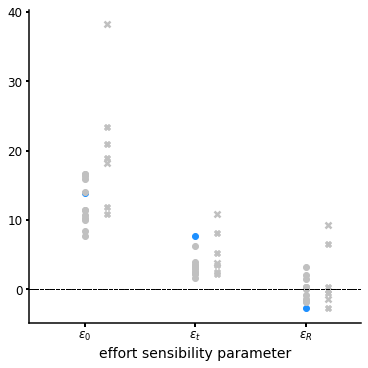

In [9]:


fig, axs = plt.subplots(1, 1, figsize=(5, 5))
ylabels = [r'$\epsilon_0$', r"$\epsilon_t$", r"$\epsilon_R$"]
ylims = [[-.2, 2.5], [-.05, .2], [-.15, .15],]


epsilon_0_intact = []
epsilon_t_intact = []
epsilon_R_intact = []

epsilon_0_lesion = []
epsilon_t_lesion = []
epsilon_R_lesion = []

for animal in animalList:
    if animal in intact:
        x = np.arange(3)
        epsilon_0_intact.append(epsilon_0[animal])
        epsilon_t_intact.append(epsilon_t[animal])
        epsilon_R_intact.append(epsilon_R[animal])

    else:
        x = np.arange(3) + .2
        epsilon_0_lesion.append(epsilon_0[animal])
        epsilon_t_lesion.append(epsilon_t[animal])
        epsilon_R_lesion.append(epsilon_R[animal])

    print(epsilon_0[animal], epsilon_t[animal], epsilon_R[animal])
    axs.scatter(x,  [epsilon_0[animal], epsilon_t[animal], epsilon_R[animal]], color=rat_markers[animal][0], label=animal, marker=rat_markers[animal][1])
    axs.set_title(f"")
    axs.set_xticks(np.arange(3))
    axs.set_xticklabels(ylabels)
    axs.set_xlim(-.5, 2.5)
    # axs.set_ylim(ylim)
    axs.axhline(0, color='black', linestyle='--', linewidth=1)

axs.set_xlabel("effort sensibility parameter")



In [36]:
perm = exact_mc_perm_test(epsilon_0_intact, epsilon_0_lesion, 10000)
print(f'p = {perm}')

perm = exact_mc_perm_test(epsilon_t_intact, epsilon_t_lesion, 10000)
print(f'p = {perm}')

perm = exact_mc_perm_test(epsilon_R_intact, epsilon_R_lesion, 10000)
print(f'p = {perm}')

print(f'significance level = {0.05/3}')


p = 0.0043
p = 0.1514
p = 0.2537
significance level = 0.016666666666666666


# test with only mu_0

In [20]:
def T_opt_n(D, vbelt, alpha, power_effort, power_time):
    T = np.linspace(0, 2.5, 750)
    vmax = (D - vbelt * T) / (T)
    cost = alpha * T * vmax ** power_effort + T**power_time
    Topt = T[np.nanargmin(cost)]
    return Topt
    
def fit_effort(epsilon, args):
    fit_param, realdist = args
    S, M, L = realdist

    loss_60 = (T_opt(S, 0, epsilon=epsilon) - fit_param["60"])**2
    loss_90 = (T_opt(M, 0, epsilon=epsilon) - fit_param["90"])**2
    loss_120 = (T_opt(L, 0, epsilon=epsilon) - fit_param["120"])**2

    loss_20 = (T_opt(L, .2, epsilon=epsilon) - fit_param["20"])**2
    loss_10 = (T_opt(L, .1, epsilon=epsilon) - fit_param["10"])**2
    loss_2 = (T_opt(L, .02, epsilon=epsilon) - fit_param["2"])**2
    loss_rev10 = (T_opt(L, -.1, epsilon=epsilon) - fit_param["rev10"])**2
    loss_rev20 = (T_opt(L, -.2, epsilon=epsilon) - fit_param["rev20"])**2

    loss = loss_60 + loss_90 + loss_120 + loss_20 + loss_10 + loss_2 + loss_rev10 + loss_rev20
    return loss

def fit_func_power(params, args):
    alpha, power_time, power_effort = params
    fit_param, realdist = args
    S, M, L = realdist

    loss_60 = (T_opt_n(S, 0, alpha=alpha, power_effort=power_effort, power_time=power_time) - fit_param["60"])**2
    loss_90 = (T_opt_n(M, 0, alpha=alpha, power_effort=power_effort, power_time=power_time) - fit_param["90"])**2
    loss_120 = (T_opt_n(L, 0, alpha=alpha, power_effort=power_effort, power_time=power_time) - fit_param["120"])**2

    loss_20 = (T_opt_n(L, .2, alpha=alpha, power_effort=power_effort, power_time=power_time) - fit_param["20"])**2
    loss_10 = (T_opt_n(L, .1, alpha=alpha, power_effort=power_effort, power_time=power_time) - fit_param["10"])**2
    loss_2 = (T_opt_n(L, .02, alpha=alpha, power_effort=power_effort, power_time=power_time) - fit_param["2"])**2
    loss_rev10 = (T_opt_n(L, -.1, alpha=alpha, power_effort=power_effort, power_time=power_time) - fit_param["rev10"])**2
    loss_rev20 = (T_opt_n(L, -.2, alpha=alpha, power_effort=power_effort, power_time=power_time) - fit_param["rev20"])**2

    loss = loss_60 + loss_90 + loss_120 + loss_20 + loss_10 + loss_2 + loss_rev10 + loss_rev20
    return loss

animal = 'RatF00'
fit_effort((11), [mu_0[animal], (medianrealdist60[animal], medianrealdist90[animal], medianrealdist120[animal])])

0.033283447907709776

(0.0, 0.8)

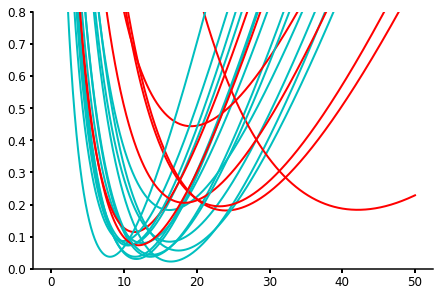

In [21]:

for animal in animalList:
    x = np.linspace(0, 50, 1000)
    y = fit_effort((x), [mu_0[animal], (medianrealdist60[animal], medianrealdist90[animal], medianrealdist120[animal])])
    if animal in intact:
        plt.plot(x, y, 'c', linewidth=2)
    else:
        plt.plot(x, y, 'r', linewidth=2)

plt.ylim(0, .8)

In [22]:
from scipy.optimize import minimize

k_intact = []
k_lesion = []

for animal in animalList:
    res = minimize(fit_effort, x0=12,
                    args=[mu_0[animal], (medianrealdist60[animal], medianrealdist90[animal], medianrealdist120[animal])],
                    method='nelder-mead', options={'xatol': 1e-9})
    if animal in intact:
        k_intact.append(res.x[0])
    else:
        k_lesion.append(res.x[0])
    print(animal, res.x, res.fun)

RatF00 [11.67901132] 0.03050125843899611
RatF01 [10.85703115] 0.07576539646238671
RatF02 [13.6071462] 0.037384999371945775
RatM00 [16.24708945] 0.1829434734508445
RatM01 [12.50717686] 0.07994935354127795
RatM02 [16.26325822] 0.08434426883695174
RatF30 [19.21323709] 0.44384380324305744
RatF31 [11.39505955] 0.11448822659712338
RatF32 [9.90930687] 0.08656428249998287
RatF33 [10.54086307] 0.07256935150074979
RatM30 [23.98851997] 0.18148052264820802
RatM31 [16.41698695] 0.022553064382477263
RatM32 [17.46871719] 0.05680900545546992
RatF40 [23.13273468] 0.19451357943645603
RatF41 [42.1299265] 0.18361888823512187
RatF42 [8.06640616] 0.03744712936109178
RatM40 [11.52110391] 0.03751822902891403
RatM41 [11.97772374] 0.07326717673104177
RatM42 [18.28402375] 0.20539098109342704
RatM43 [13.81738794] 0.04338600941882781


Text(0, 0.5, 'effort sensitivity parameter')

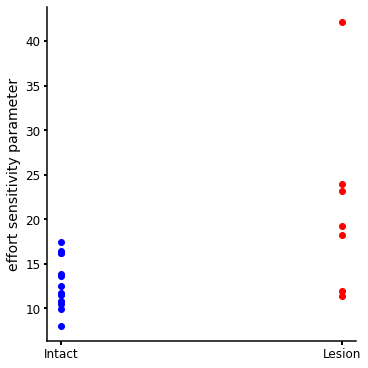

In [23]:
fig, ax = plt.subplots(figsize=(5, 5))

ax.plot([1 for _ in range(len(k_intact))], k_intact, 'o', color='blue', label='Intact')
ax.plot([2 for _ in range(len(k_lesion))], k_lesion, 'o', color='red', label='Lesion')
ax.set_xticks([1, 2])
ax.set_xticklabels(['Intact', 'Lesion'])
ax.set_ylabel('effort sensitivity parameter')

In [24]:
perm = exact_mc_perm_test(k_intact, k_lesion)
print('p-value = {}'.format(perm))

p-value = 0.0032


In [25]:
from scipy.optimize import minimize

k_intact = []
k_lesion = []
effort_intact = []
effort_lesion = []
time_intact = []
time_lesion = []

for animal in animalList:
    res = minimize(fit_func_power, 
                    x0=[15, 3, 2], 
                    args=[mu_0[animal], (medianrealdist60[animal], medianrealdist90[animal], medianrealdist120[animal])],
                    method='nelder-mead', options={'xatol': 1e-8})
    if animal in intact:
        k_intact.append(res.x[0])
        time_intact.append(res.x[1])
        effort_intact.append(res.x[2])

    else:
        k_lesion.append(res.x[0])
        time_lesion.append(res.x[1])
        effort_lesion.append(res.x[2])
        
    print(animal, res.x, res.fun)

/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/david/.local/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in multiply
  after removing the cwd from sys.path.


RatF00 [16.57620459  3.98091783  2.37988603] 0.014817834116605755
RatF01 [45.90205229  6.66138607  2.63948036] 0.0239143890446227
RatF02 [12.41700324  3.14464594  2.40185838] 0.022056217941151812
RatM00 [10.44995082  2.69769048  3.59405752] 0.05473779143777764
RatM01 [11.15513363  3.19677594  2.71794651] 0.040813300191514204
RatM02 [36.17977393  4.7707284   3.10440242] 0.02085269682950606
RatF30 [11.05654025  2.45992551  3.48225648] 0.293919447455498
RatF31 [38.66218856  6.38870602  3.98225865] 0.042376198977338686
RatF32 [9.57650992 3.62998808 3.4653845 ] 0.02804065908093885
RatF33 [21.24868937  5.27798788  4.19063196] 0.026459331080313078
RatM30 [13.39489     2.45806641  2.80028491] 0.09897558268163906
RatM31 [14.66873826  2.9474198   2.16061256] 0.018486117295738347
RatM32 [24.55035791  3.74968296  2.29717701] 0.04169152276348373
RatF40 [11.29302909  2.30008361  3.09807764] 0.036994096944588495
RatF41 [16.12529765  2.08878794  2.36827256] 0.08288774077934663
RatF42 [10.13418693  4.2

Text(0, 0.5, 'effort power')

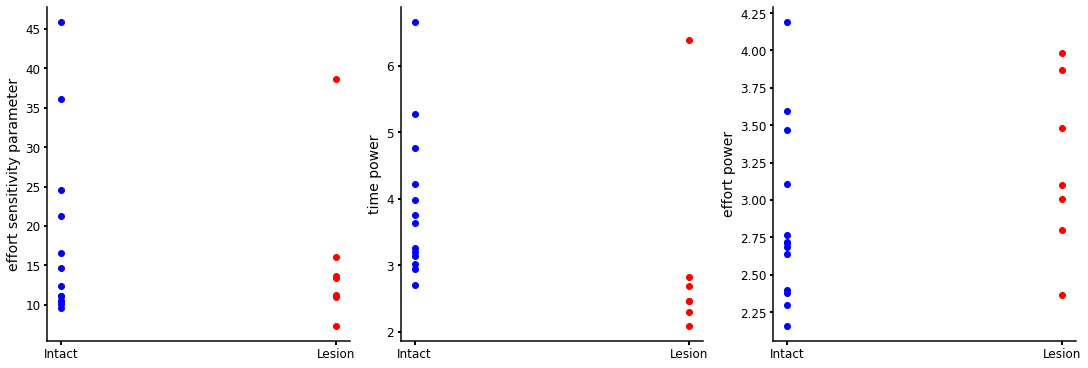

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot([1 for _ in range(len(k_intact))], k_intact, 'o', color='blue', label='Intact')
axs[0].plot([2 for _ in range(len(k_lesion))], k_lesion, 'o', color='red', label='Lesion')
axs[0].set_xticks([1, 2])
axs[0].set_xticklabels(['Intact', 'Lesion'])
axs[0].set_ylabel('effort sensitivity parameter')

axs[1].plot([1 for _ in range(len(time_intact))], time_intact, 'o', color='blue', label='Intact')
axs[1].plot([2 for _ in range(len(time_lesion))], time_lesion, 'o', color='red', label='Lesion')
axs[1].set_xticks([1, 2])
axs[1].set_xticklabels(['Intact', 'Lesion'])
axs[1].set_ylabel('time power')

axs[2].plot([1 for _ in range(len(effort_intact))], effort_intact, 'o', color='blue', label='Intact')
axs[2].plot([2 for _ in range(len(effort_lesion))], effort_lesion, 'o', color='red', label='Lesion')
axs[2].set_xticks([1, 2])
axs[2].set_xticklabels(['Intact', 'Lesion'])
axs[2].set_ylabel('effort power')

In [27]:
perm = exact_mc_perm_test(k_intact, k_lesion)
print('p-value = {}'.format(perm))

perm = exact_mc_perm_test(time_intact, time_lesion)
print('p-value = {}'.format(perm))

perm = exact_mc_perm_test(effort_intact, effort_lesion)
print('p-value = {}'.format(perm))

p-value = 0.6775
p-value = 0.159
p-value = 0.18
